# Boston House Prices Prediction

### 1. Importing the libraries

A Python library is a collection of related modules. It contains bundles of code that can be used repeatedly in different programs. It makes Python Programming simpler and convenient for the programmer. As we don't need to write the same code again and again for different programs.

In this notebook, we will be using the following libraries.

In [1]:
### Data Wrangling 

import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

### Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

import statsmodels.api as sm
from scipy import stats

### Modelling 

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xg

### Tabulating the results

from tabulate import tabulate

### Remove unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

### 2. Importing the data

In this section, I will fetch the dataset that is available in the Kaggle's project description in the Data section.

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each Boston suburb or town. Your model will be based on “features” like average number of rooms per dwelling, full-value property tax, etc. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth. It is your job to predict these outcomes. For each Boston suburb or town, our task is to predict the median value of owner-occupied homes in $1000s.

In [2]:
### Fetching the dataset

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('../Datasets/housing.csv', header = None, delimiter = r"\s+", names = column_names)

In [3]:
### Looking at the sample data in the dataset

dataset.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [4]:
### Shape of the dataset

dataset.shape

(506, 14)

The training dataset consists of 14 columns and 506 rows.

### 3. Exploratory Data Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Here, we will perform EDA on the categorical columns of the dataset - CHAS, RAD and the numerical columns of the dataset - CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, B, LSTAT, MEDV.

#### 3.1 Datatypes, Missing Data, and Summary Statistics

In [5]:
### Looking at the datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Here, the columns - CHAS and RAD are categorical. Hence, we modify the datatype of these columns to category.

In [6]:
### Changing the datatype of the columns - CHAS, RAD to category in the dataset

dataset.CHAS = dataset.CHAS.astype('category')
dataset.RAD = dataset.RAD.astype('category')

Looking at the modified datatypes of the columns in the dataset.

In [7]:
### Looking at the modified datatypes of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


From the above data, it is evident that there are no missing values in the dataset. Let's verify that.

In [8]:
### Missing data by columns in the dataset

dataset.isnull().sum().sort_values(ascending = False)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Here, we can see that there are no missing values in the dataset.

<AxesSubplot:>

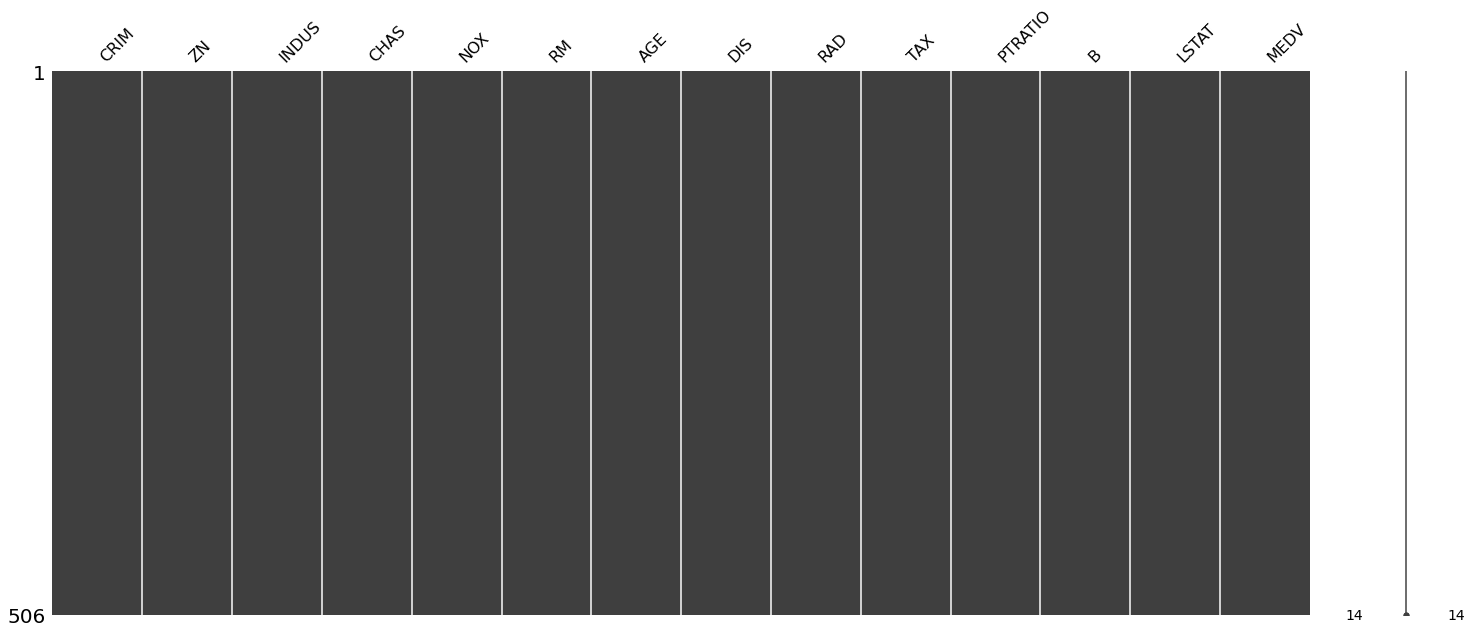

In [9]:
### Visual representation of the missing data in the dataset

missingno.matrix(dataset)

In [10]:
### Summary statistics of the numerical columns in the dataset

dataset.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


#### 3.2 Feature Analysis

##### 3.2.1 Categorical variable - CHAS

In [11]:
### Value counts of the column - CHAS

chas_count = dataset['CHAS'].value_counts(dropna = False)
chas_count

0    471
1     35
Name: CHAS, dtype: int64

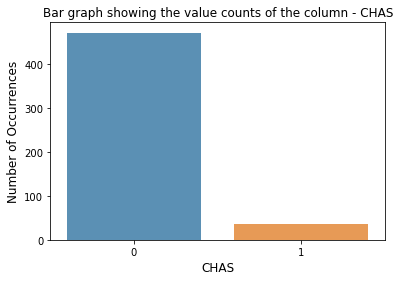

In [12]:
### Bar graph showing the value counts of the column - CHAS

sns.barplot(chas_count.index, chas_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - CHAS')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('CHAS', fontsize = 12)
plt.show()

From the above graph, we can see that most of the values of the column CHAS is 0.

In [13]:
### Mean price per each CHAS 

mean_price_chas = dataset[['CHAS', 'MEDV']].groupby('CHAS', as_index = False).mean()
mean_price_chas

,CHAS,MEDV
0,0,22.093843
1,1,28.440000


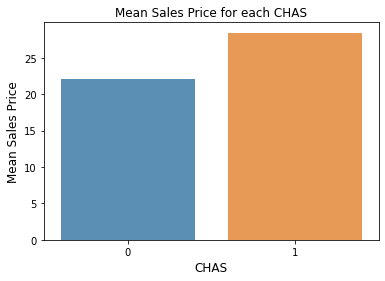

In [14]:
### Mean Sales Price for each CHAS

sns.barplot(mean_price_chas['CHAS'], mean_price_chas['MEDV'], alpha = 0.8)
plt.title('Mean Sales Price for each CHAS')
plt.ylabel('Mean Sales Price', fontsize = 12)
plt.xlabel('CHAS', fontsize = 12)
plt.show()

From the above graph, we can see that the mean sales price of a house is similar in both the houses that are either river bound or not.

##### 3.2.2 Categorical variable - RAD

In [15]:
### Value counts of the column - RAD

rad_count = dataset['RAD'].value_counts(dropna = False)
rad_count

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

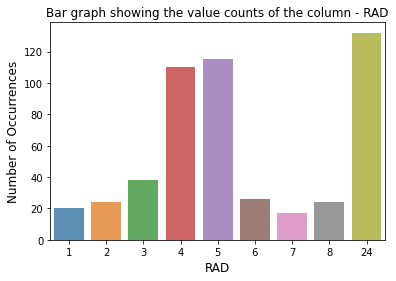

In [16]:
### Bar graph showing the value counts of the column - RAD

sns.barplot(rad_count.index, rad_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - RAD')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('RAD', fontsize = 12)
plt.show()

From the above graph, we can see that there are 9 different values for the column - RAD.

In [17]:
### Mean price per each RAD 

mean_price_rad = dataset[['RAD', 'MEDV']].groupby('RAD', as_index = False).mean()
mean_price_rad

,RAD,MEDV
0,1,24.365000
1,2,26.833333
2,3,27.928947
3,4,21.387273
4,5,25.706957
5,6,20.976923
6,7,27.105882
7,8,30.358333
8,24,16.403788


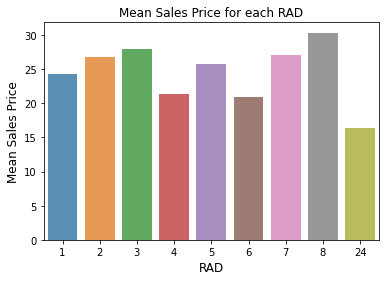

In [18]:
### Mean Sales Price for each RAD

sns.barplot(mean_price_rad['RAD'], mean_price_rad['MEDV'], alpha = 0.8)
plt.title('Mean Sales Price for each RAD')
plt.ylabel('Mean Sales Price', fontsize = 12)
plt.xlabel('RAD', fontsize = 12)
plt.show()

Here, we can see that the mean sales price based on RAD is almost similar for each RAD type except 24. We will use this observation during Feature Engineering where we focus on reducing the number of different values for RAD.

##### 3.2.3 Numerical variable - MEDV

Text(0.5, 1.0, 'Median Value Distribution')

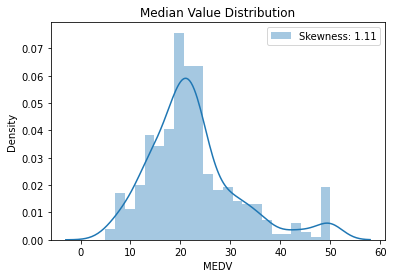

In [19]:
### Understanding the distribution of the column - MEDV

sns.distplot(dataset['MEDV'], label = 'Skewness: %.2f'%(dataset['MEDV'].skew()))
plt.legend(loc = 'best')
plt.title('Median Value Distribution')

From the above graph, we can see that the distribution is close to normal distribution with a slight skewness.

##### 3.2.4 Numerical variable - CRIM

Text(0.5, 1.0, 'Per Capita Crime Rate By Town')

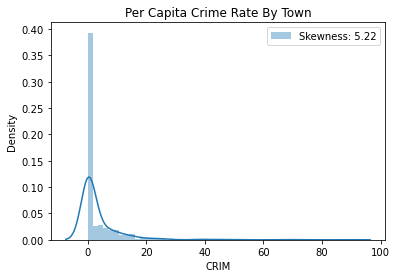

In [20]:
### Understanding the distribution of the column - CRIM

sns.distplot(dataset['CRIM'], label = 'Skewness: %.2f'%(dataset['CRIM'].skew()))
plt.legend(loc = 'best')
plt.title('Per Capita Crime Rate By Town')

From the above graph, we can see that there is a high degree of skewness in the distribution of the column - CRIM.

##### 3.2.5 Numerical variable - ZN

Text(0.5, 1.0, 'Proportion of Residential Land Zones')

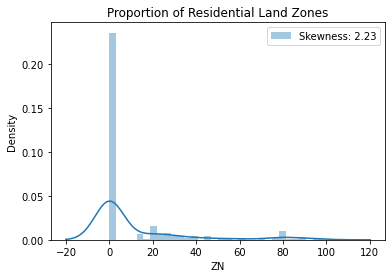

In [21]:
### Understanding the distribution of the column - ZN

sns.distplot(dataset['ZN'], label = 'Skewness: %.2f'%(dataset['ZN'].skew()))
plt.legend(loc = 'best')
plt.title('Proportion of Residential Land Zones')

From the above graph, we can see that there is a high degree of skewness in the distribution of the column - ZN.

##### 3.2.6 Numerical variable - INDUS

Text(0.5, 1.0, 'Proportion of Non - Retail Business Acres Per Town')

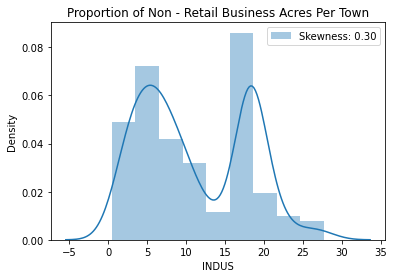

In [22]:
### Understanding the distribution of the column - INDUS

sns.distplot(dataset['INDUS'], label = 'Skewness: %.2f'%(dataset['INDUS'].skew()))
plt.legend(loc = 'best')
plt.title('Proportion of Non - Retail Business Acres Per Town')

From the above graph, we can see that there are 2 modes for the column - INDUS.

##### 3.2.7 Numerical variable - NOX

Text(0.5, 1.0, 'Nitric Oxide Concentration - Distribution')

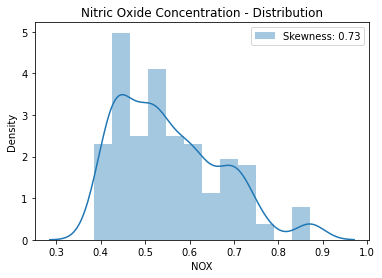

In [23]:
### Understanding the distribution of the column - NOX

sns.distplot(dataset['NOX'], label = 'Skewness: %.2f'%(dataset['NOX'].skew()))
plt.legend(loc = 'best')
plt.title('Nitric Oxide Concentration - Distribution')

From the above graph, we can see that the above distribution has a less degree of skewness.

##### 3.2.8 Numerical variable - RM

Text(0.5, 1.0, 'Average number of rooms per dwelling')

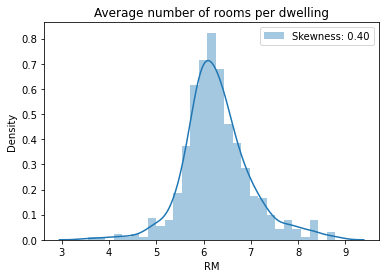

In [24]:
### Understanding the distribution of the column - RM

sns.distplot(dataset['RM'], label = 'Skewness: %.2f'%(dataset['RM'].skew()))
plt.legend(loc = 'best')
plt.title('Average number of rooms per dwelling')

From the above graph, we can see that the distribution is close to normal distribution with a very slight skewness.

##### 3.2.9 Numerical variable - AGE

Text(0.5, 1.0, 'Proportion of Owner Occupied Units')

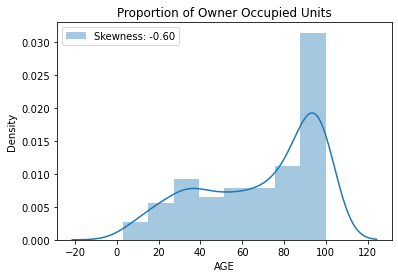

In [25]:
### Understanding the distribution of the column - AGE

sns.distplot(dataset['AGE'], label = 'Skewness: %.2f'%(dataset['AGE'].skew()))
plt.legend(loc = 'best')
plt.title('Proportion of Owner Occupied Units')

From the above graph, we can see that the distribution is slightly left skewed.

##### 3.2.10 Numerical variable - DIS

Text(0.5, 1.0, 'Weighted Distances Distribution')

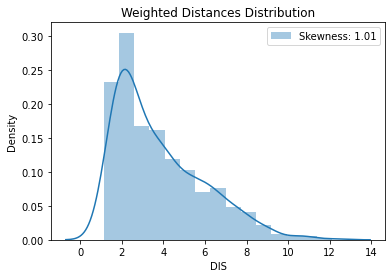

In [26]:
### Understanding the distribution of the column - DIS

sns.distplot(dataset['DIS'], label = 'Skewness: %.2f'%(dataset['DIS'].skew()))
plt.legend(loc = 'best')
plt.title('Weighted Distances Distribution')

From the above graph, we can see that the distribution is slightly right skewed with a slight degree of skewness.

##### 3.2.11 Numerical variable - TAX

Text(0.5, 1.0, 'Full Value Property Tax Distribution')

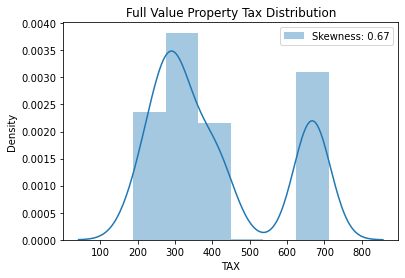

In [27]:
### Understanding the distribution of the column - TAX

sns.distplot(dataset['TAX'], label = 'Skewness: %.2f'%(dataset['TAX'].skew()))
plt.legend(loc = 'best')
plt.title('Full Value Property Tax Distribution')

From the above graph, we can see that there are 2 modes for the column - TAX.

##### 3.2.12 Numerical variable - PTRATIO

Text(0.5, 1.0, 'Pupil Teacher Ratio By Town')

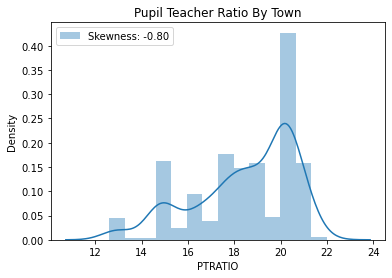

In [28]:
### Understanding the distribution of the column - PTRATIO

sns.distplot(dataset['PTRATIO'], label = 'Skewness: %.2f'%(dataset['PTRATIO'].skew()))
plt.legend(loc = 'best')
plt.title('Pupil Teacher Ratio By Town')

From the above graph, we can see that the distribution is slightly left skewed.

##### 3.2.13 Numerical variable - B

Text(0.5, 1.0, 'Proportion of Blacks By Town')

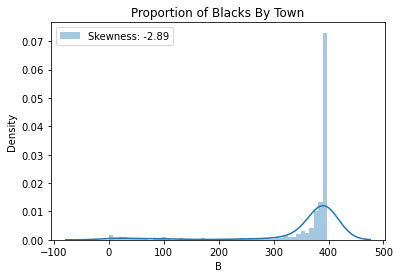

In [29]:
### Understanding the distribution of the column - B

sns.distplot(dataset['B'], label = 'Skewness: %.2f'%(dataset['B'].skew()))
plt.legend(loc = 'best')
plt.title('Proportion of Blacks By Town')

From the above graph, we can see that the distribution is highly left skewed.

##### 3.2.14 Numerical variable - LSTAT

Text(0.5, 1.0, 'Distribution of the Lower Status of the Population')

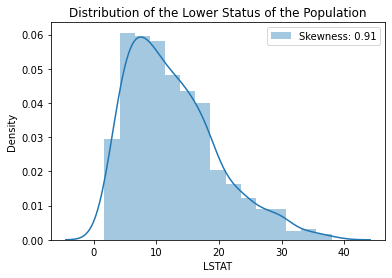

In [30]:
### Understanding the distribution of the column - LSTAT

sns.distplot(dataset['LSTAT'], label = 'Skewness: %.2f'%(dataset['LSTAT'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the Lower Status of the Population')

From the above graph, we can see that the distribution is slightly right skewed.

### 4. Data Preprocessing

Data preprocessing is the process of getting our dataset ready for model training. In this section, we will perform the following preprocessing steps:

1. Detect and remove outliers in numerical variables
2. Feature Engineering
3. Data Trasformation
4. Feature Encoding
5. Feature Selection

#### 4.1 Detect and remove outliers in numerical variables

Outliers are data points that have extreme values and they do not conform with the majority of the data. It is important to address this because outliers tend to skew our data towards extremes and can cause inaccurate model predictions. I will use the Tukey method to remove these outliers.

Here, we will write a function that will loop through a list of features and detect outliers in each one of those features. In each loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very last feature is completed. Finally, using the list with outlier indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.

In [31]:
def detect_outliers(df, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(dataset, 2, ['MEDV', 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 
                                               'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 13 indices:  [195, 203, 204, 257, 262, 267, 283, 367, 374, 384, 412, 414, 438]


Now let's look at the data present in the rows.

In [32]:
dataset.iloc[outliers_to_drop, :]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255.0,14.4,394.23,2.97,50.0
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224.0,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,50.0
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264.0,13.0,389.70,5.12,50.0
262,0.52014,20.0,3.97,0,0.6470,8.398,91.5,2.2885,5,264.0,13.0,386.86,5.91,48.8
267,0.57834,20.0,3.97,0,0.5750,8.297,67.0,2.4216,5,264.0,13.0,384.54,7.44,50.0
283,0.01501,90.0,1.21,1,0.4010,7.923,24.8,5.8850,1,198.0,13.6,395.52,3.16,50.0
367,13.52220,0.0,18.10,0,0.6310,3.863,100.0,1.5106,24,666.0,20.2,131.42,13.33,23.1
374,18.49820,0.0,18.10,0,0.6680,4.138,100.0,1.1370,24,666.0,20.2,396.90,37.97,13.8
384,20.08490,0.0,18.10,0,0.7000,4.368,91.2,1.4395,24,666.0,20.2,285.83,30.63,8.8


We will drop these rows from the dataset.

In [33]:
### Drop outliers and reset index

print("Before: {} rows".format(len(dataset)))
dataset = dataset.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(dataset)))

Before: 506 rows
After: 493 rows


In [34]:
### Lets look at the new dataset

dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
489,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
490,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
491,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### 4.2 Feature Engineering

Feature engineering is arguably the most important art in machine learning. It is the process of creating new features from existing features to better represent the underlying problem to the predictive models resulting in improved model accuracy on unseen data.

Here, we focus on creating new columns for:
1. RiverBound - using the column CHAS
2. NewRAD - using the column RAD
3. TaxSlab - using the column Tax

##### 4.2.1 RiverBound - using the column CHAS

The column RiverBound consists of two variables - Yes or No based on the column - CHAS. If CHAS value is 1, then RiverBound is Yes; else No.

In [35]:
### Fetching the data - CHAS

chas_data = list(dataset['CHAS'])

### Creating new column - RiverBound

river_bound = []
for value in chas_data:
    if value == 1:
        river_bound.append('Yes')
    else:
        river_bound.append('No')

In [36]:
### Adding the river_bound data to RiverBound column of the dataset

dataset['RiverBound'] = river_bound
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RiverBound
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,No
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,No
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,No
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,No
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,No
489,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,No
490,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,No
491,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,No


In [37]:
### Dropping the column - CHAS from the dataset

dataset.drop(['CHAS'], axis = 1, inplace = True)
dataset

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RiverBound
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,No
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,No
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,No
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,No
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,No
489,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,No
490,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,No
491,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,No


##### 4.2.2 NewRAD - using the column RAD

Here, we will modify the RAD column to 2 new classes. One belonging to RAD value 24 and other belonging to remaining all RAD values.

In [38]:
### Fetching the data - RAD

rad_data = list(dataset['RAD'])

### Creating new column - NewRAD

new_rad = []
for value in rad_data:
    if value == 24:
        new_rad.append(1)
    else:
        new_rad.append(2)

In [39]:
### Adding the new_rad data to NewRAD column of the dataset

dataset['NewRAD'] = new_rad
dataset

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,RiverBound,NewRAD
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,No,2
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,No,2
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,No,2
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,No,2
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,No,2
489,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,No,2
490,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,No,2
491,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,No,2


In [40]:
### Dropping the column - RAD from the dataset

dataset.drop(['RAD'], axis = 1, inplace = True)
dataset

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,RiverBound,NewRAD
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,No,2
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,No,2
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,No,2
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,No,2
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4,No,2
489,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6,No,2
490,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9,No,2
491,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0,No,2


##### 4.2.3 TaxSlab - using the Tax column

Since, the Tax column is bi-modal with clear seperation between the data, we will divide the data into 2 categories and check if the Sales Price of a house varies with each class.

In [41]:
### Fetching the data - TAX

tax_data = list(dataset['TAX'])

### Creating new column - TaxSlab

tax_slab = []
for value in tax_data:
    if value <= np.median(tax_data):
        tax_slab.append('Class 1')
    else:
        tax_slab.append('Class 2')

In [42]:
### Adding the tax_slab data to TaxSlab column of the dataset

dataset['TaxSlab'] = tax_slab
dataset

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,RiverBound,NewRAD,TaxSlab
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0,No,2,Class 1
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6,No,2,Class 1
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7,No,2,Class 1
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4,No,2,Class 1
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2,No,2,Class 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4,No,2,Class 1
489,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6,No,2,Class 1
490,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9,No,2,Class 1
491,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0,No,2,Class 1


In [43]:
### Value counts of the column - TaxSlab

tax_slab_count = dataset['TaxSlab'].value_counts(dropna = False)
tax_slab_count

Class 1    249
Class 2    244
Name: TaxSlab, dtype: int64

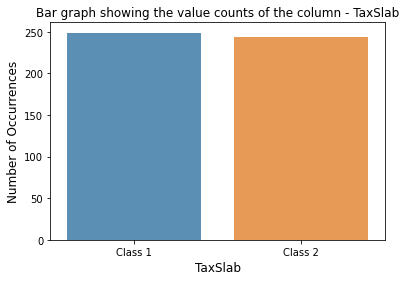

In [44]:
### Bar graph showing the value counts of the column - TaxSlab

sns.barplot(tax_slab_count.index, tax_slab_count.values, alpha = 0.8)
plt.title('Bar graph showing the value counts of the column - TaxSlab')
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('TaxSlab', fontsize = 12)
plt.show()

In [45]:
### Mean price per each RAD 

mean_price_tax_slab = dataset[['TaxSlab', 'MEDV']].groupby('TaxSlab', as_index = False).mean()
mean_price_tax_slab

,TaxSlab,MEDV
0,Class 1,25.315663
1,Class 2,19.146311


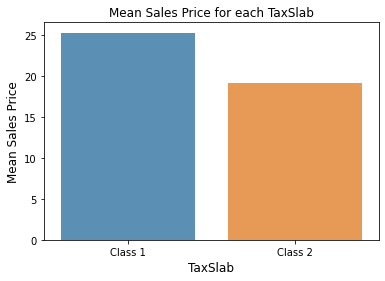

In [46]:
### Mean Sales Price for each TaxSlab

sns.barplot(mean_price_tax_slab['TaxSlab'], mean_price_tax_slab['MEDV'], alpha = 0.8)
plt.title('Mean Sales Price for each TaxSlab')
plt.ylabel('Mean Sales Price', fontsize = 12)
plt.xlabel('TaxSlab', fontsize = 12)
plt.show()

From the above graph, we can see that the Sales Price is lesser for the houses that belong to Class 2.

In [47]:
### Dropping the column - TAX from the dataset

dataset.drop(['TAX'], axis = 1, inplace = True)
dataset

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV,RiverBound,NewRAD,TaxSlab
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,15.3,396.90,4.98,24.0,No,2,Class 1
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,17.8,396.90,9.14,21.6,No,2,Class 1
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,17.8,392.83,4.03,34.7,No,2,Class 1
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,18.7,394.63,2.94,33.4,No,2,Class 1
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,18.7,396.90,5.33,36.2,No,2,Class 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,21.0,391.99,9.67,22.4,No,2,Class 1
489,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,21.0,396.90,9.08,20.6,No,2,Class 1
490,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,21.0,396.90,5.64,23.9,No,2,Class 1
491,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,21.0,393.45,6.48,22.0,No,2,Class 1


#### 4.3 Data Transformation

In this section, we will remove the skewness present in the columns - CRIM, ZN by using a Box-Cox transformation on the data. Then, we will normalize all the numerical columns apart from the Target using MinMax Normalization.

##### 4.3.1 Box-Cox Transforming the column - ZN

Text(0.5, 1.0, 'Proportion of Residential Land Zones')

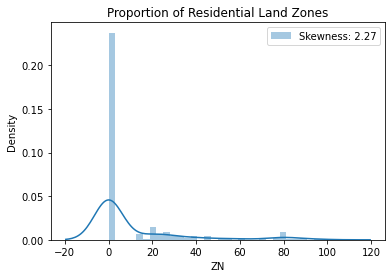

In [48]:
### Understanding the distribution of the column - ZN

sns.distplot(dataset['ZN'], label = 'Skewness: %.2f'%(dataset['ZN'].skew()))
plt.legend(loc = 'best')
plt.title('Proportion of Residential Land Zones')

Text(0.5, 1.0, 'Proportion of Residential Land Zones')

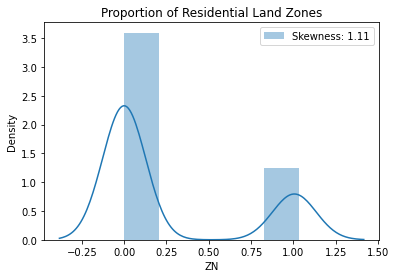

In [49]:
### Understanding the distribution of the data Box_Cox(ZN)

zn_data = [1 if value == 0 else value for value in dataset['ZN']]

modified_zn, _ = stats.boxcox(zn_data)
dataset['ZN'] = modified_zn

sns.distplot(dataset['ZN'], label = 'Skewness: %.2f'%(dataset['ZN'].skew()))
plt.legend(loc = 'best')
plt.title('Proportion of Residential Land Zones')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.3.2 Box-Cox Transforming the column - CRIM

Text(0.5, 1.0, 'Per Capita Crime Rate By Town')

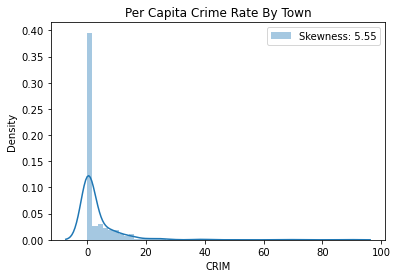

In [50]:
### Understanding the distribution of the column - CRIM

sns.distplot(dataset['CRIM'], label = 'Skewness: %.2f'%(dataset['CRIM'].skew()))
plt.legend(loc = 'best')
plt.title('Per Capita Crime Rate By Town')

Text(0.5, 1.0, 'Per Capita Crime Rate By Town')

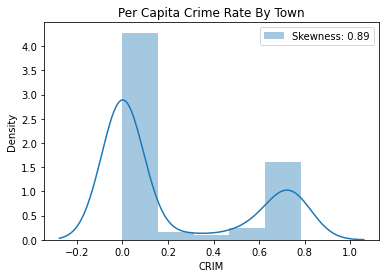

In [51]:
### Understanding the distribution of the data Box_Cox(CRIM)

crim_data = [1 if value < 1 else value for value in dataset['CRIM']]

modified_crim, _ = stats.boxcox(crim_data)
dataset['CRIM'] = modified_crim

sns.distplot(dataset['CRIM'], label = 'Skewness: %.2f'%(dataset['CRIM'].skew()))
plt.legend(loc = 'best')
plt.title('Per Capita Crime Rate By Town')

From the above graph, we can see that the degree of skewness is significantly reduced than compared to the skewness in the original data.

##### 4.3.4 Normalizing the numerical columns

In [52]:
### A function to normalize numerical columns

def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)
    
    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))
    
    dataframe[column] = new_data

numerical_columns = list(dataset.columns)[: -4]
for each_column in numerical_columns:
    normalize_columns(dataset, each_column)

In [53]:
### Looking at the sample records of the dataset

dataset

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV,RiverBound,NewRAD,TaxSlab
0,0.0,0.948555,0.058148,0.314815,0.577505,0.641607,0.269203,0.287234,1.000000,0.098366,24.0,No,2,Class 1
1,0.0,0.000000,0.234444,0.172840,0.547998,0.782698,0.348962,0.553191,1.000000,0.224274,21.6,No,2,Class 1
2,0.0,0.000000,0.234444,0.172840,0.694386,0.599382,0.348962,0.553191,0.989737,0.069613,34.7,No,2,Class 1
3,0.0,0.000000,0.053333,0.150206,0.658555,0.441813,0.448545,0.648936,0.994276,0.036622,33.4,No,2,Class 1
4,0.0,0.000000,0.053333,0.150206,0.687105,0.528321,0.448545,0.648936,1.000000,0.108959,36.2,No,2,Class 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.0,0.000000,0.414444,0.386831,0.580954,0.681771,0.122671,0.893617,0.987619,0.240315,22.4,No,2,Class 1
489,0.0,0.000000,0.414444,0.386831,0.490324,0.760041,0.105293,0.893617,1.000000,0.222458,20.6,No,2,Class 1
490,0.0,0.000000,0.414444,0.386831,0.654340,0.907312,0.094381,0.893617,1.000000,0.118341,23.9,No,2,Class 1
491,0.0,0.000000,0.414444,0.386831,0.619467,0.889804,0.114514,0.893617,0.991301,0.143765,22.0,No,2,Class 1


#### 4.4 Feature Encoding

Feature encoding is the process of turning categorical data in a dataset into numerical data. It is essential that we perform feature encoding because most machine learning models can only interpret numerical data and not data in text form.

Here, we will use One Hot Encoding for the columns - RiverBound, NewRAD, TaxSlab.

In [54]:
### One Hot Encoding the columns - RiverBound, NewRAD, TaxSlab of the dataset

encoded_dataset = pd.get_dummies(data = dataset, columns = ['RiverBound', 'NewRAD', 'TaxSlab'])
encoded_dataset

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,MEDV,RiverBound_No,RiverBound_Yes,NewRAD_1,NewRAD_2,TaxSlab_Class 1,TaxSlab_Class 2
0,0.0,0.948555,0.058148,0.314815,0.577505,0.641607,0.269203,0.287234,1.000000,0.098366,24.0,1,0,0,1,1,0
1,0.0,0.000000,0.234444,0.172840,0.547998,0.782698,0.348962,0.553191,1.000000,0.224274,21.6,1,0,0,1,1,0
2,0.0,0.000000,0.234444,0.172840,0.694386,0.599382,0.348962,0.553191,0.989737,0.069613,34.7,1,0,0,1,1,0
3,0.0,0.000000,0.053333,0.150206,0.658555,0.441813,0.448545,0.648936,0.994276,0.036622,33.4,1,0,0,1,1,0
4,0.0,0.000000,0.053333,0.150206,0.687105,0.528321,0.448545,0.648936,1.000000,0.108959,36.2,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.0,0.000000,0.414444,0.386831,0.580954,0.681771,0.122671,0.893617,0.987619,0.240315,22.4,1,0,0,1,1,0
489,0.0,0.000000,0.414444,0.386831,0.490324,0.760041,0.105293,0.893617,1.000000,0.222458,20.6,1,0,0,1,1,0
490,0.0,0.000000,0.414444,0.386831,0.654340,0.907312,0.094381,0.893617,1.000000,0.118341,23.9,1,0,0,1,1,0
491,0.0,0.000000,0.414444,0.386831,0.619467,0.889804,0.114514,0.893617,0.991301,0.143765,22.0,1,0,0,1,1,0


In [55]:
### Create the column - Target using MEDV

target_data = encoded_dataset['MEDV']
encoded_dataset['Target'] = target_data

### Dropping the column - MEDV

encoded_dataset.drop(['MEDV'], axis = 1, inplace = True)
encoded_dataset

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT,RiverBound_No,RiverBound_Yes,NewRAD_1,NewRAD_2,TaxSlab_Class 1,TaxSlab_Class 2,Target
0,0.0,0.948555,0.058148,0.314815,0.577505,0.641607,0.269203,0.287234,1.000000,0.098366,1,0,0,1,1,0,24.0
1,0.0,0.000000,0.234444,0.172840,0.547998,0.782698,0.348962,0.553191,1.000000,0.224274,1,0,0,1,1,0,21.6
2,0.0,0.000000,0.234444,0.172840,0.694386,0.599382,0.348962,0.553191,0.989737,0.069613,1,0,0,1,1,0,34.7
3,0.0,0.000000,0.053333,0.150206,0.658555,0.441813,0.448545,0.648936,0.994276,0.036622,1,0,0,1,1,0,33.4
4,0.0,0.000000,0.053333,0.150206,0.687105,0.528321,0.448545,0.648936,1.000000,0.108959,1,0,0,1,1,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.0,0.000000,0.414444,0.386831,0.580954,0.681771,0.122671,0.893617,0.987619,0.240315,1,0,0,1,1,0,22.4
489,0.0,0.000000,0.414444,0.386831,0.490324,0.760041,0.105293,0.893617,1.000000,0.222458,1,0,0,1,1,0,20.6
490,0.0,0.000000,0.414444,0.386831,0.654340,0.907312,0.094381,0.893617,1.000000,0.118341,1,0,0,1,1,0,23.9
491,0.0,0.000000,0.414444,0.386831,0.619467,0.889804,0.114514,0.893617,0.991301,0.143765,1,0,0,1,1,0,22.0


#### 4.5 Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

##### 4.5.1 Plotting the correlation matrix for the numerical columns

Text(0.5, 1.0, 'Correlation Heatmap')

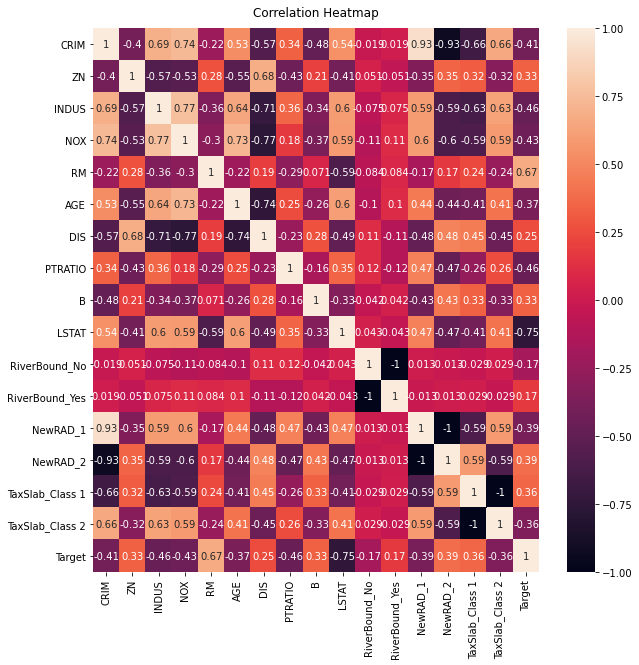

In [56]:
### Plotting the correlation between various columns of the filter_dataset

plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(encoded_dataset.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

From the above figure, we can see that there are a few strong correlations between the columns.

##### 4.5.2 Removing the columns that cause multicollinearity

On observing the above correlations, we will drop the columns NOX, DIS, AGE from the dataset to ensure we reduce the impact of certain features over other.

Now, we will remove the columns - NOX, DIS, AGE from the encoded dataset.

In [57]:
### Dropping the columns - NOX, DIS, AGE from the encoded dataset

encoded_dataset.drop(['NOX', 'DIS', 'AGE'], axis = 1, inplace = True)
encoded_dataset

,CRIM,ZN,INDUS,RM,PTRATIO,B,LSTAT,RiverBound_No,RiverBound_Yes,NewRAD_1,NewRAD_2,TaxSlab_Class 1,TaxSlab_Class 2,Target
0,0.0,0.948555,0.058148,0.577505,0.287234,1.000000,0.098366,1,0,0,1,1,0,24.0
1,0.0,0.000000,0.234444,0.547998,0.553191,1.000000,0.224274,1,0,0,1,1,0,21.6
2,0.0,0.000000,0.234444,0.694386,0.553191,0.989737,0.069613,1,0,0,1,1,0,34.7
3,0.0,0.000000,0.053333,0.658555,0.648936,0.994276,0.036622,1,0,0,1,1,0,33.4
4,0.0,0.000000,0.053333,0.687105,0.648936,1.000000,0.108959,1,0,0,1,1,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,0.0,0.000000,0.414444,0.580954,0.893617,0.987619,0.240315,1,0,0,1,1,0,22.4
489,0.0,0.000000,0.414444,0.490324,0.893617,1.000000,0.222458,1,0,0,1,1,0,20.6
490,0.0,0.000000,0.414444,0.654340,0.893617,1.000000,0.118341,1,0,0,1,1,0,23.9
491,0.0,0.000000,0.414444,0.619467,0.893617,0.991301,0.143765,1,0,0,1,1,0,22.0


Text(0.5, 1.0, 'Correlation Heatmap')

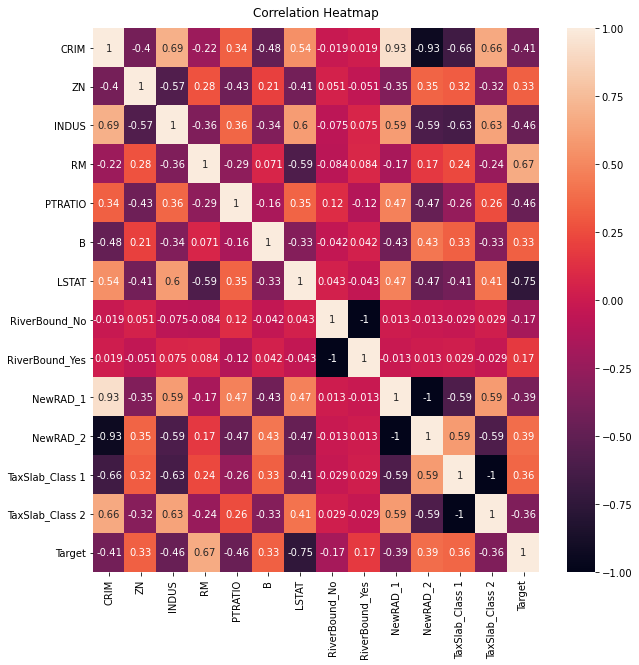

In [58]:
### Plotting the new correlation matrix

plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(encoded_dataset.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

Now our datasets are ready for modelling.

### 5. Modelling

Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

Since Boston House Prices is a regression problem, we will need to use regression models, also known as regressors, to train on our model to make predictions. I highly recommend checking out the scikit-learn documentation for more information on the different machine learning models available in their library. I have chosen the following regression models for the job:

1. Multi Linear Regression
2. Lasso Regression
3. Ridge Regression
4. Support Vector Regression
5. Decision Tree regression
6. Random Forest Regression
7. Stacking Regression
8. XGBoost Regression 

In this section of the notebook, I will fit the models to the training set as outlined above and evaluate their Root Mean Squared Error (RMSE) at making predictions. Then, we will select the best model based on the least RMSE value.

#### 5.1 Splitting the data to Training and Test sets

Here, we will split the training data into X_train, X_test, Y_train, and Y_test so that they can be fed to the machine learning models that are used in the next section. Then the model with the best performance will be used to predict the result on the given test dataset.

In [59]:
### Splitting the dataset to the matrices X and Y

X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values

In [60]:
### Looking at the new training data - X

X

array([[0.        , 0.94855526, 0.05814815, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.23444444, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.23444444, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.41444444, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.41444444, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.41444444, ..., 1.        , 1.        ,
        0.        ]])

In [61]:
### Looking at the new test data - Y

Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [62]:
### Dividing the dataset into train and test in the ratio of 80 : 20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27, shuffle = True)

In [63]:
X_train

array([[0.        , 0.        , 0.41444444, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.24592593, ..., 1.        , 1.        ,
        0.        ],
       [0.86771209, 0.        , 0.64296296, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.16481481, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.0637037 , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.27407407, ..., 1.        , 1.        ,
        0.        ]])

In [64]:
X_test

array([[0.90983087, 0.        , 0.64296296, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.99868721, 0.11148148, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.20222222, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.35788995, 0.        , 0.69777778, ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.98580819, 0.1       , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.33148148, ..., 1.        , 0.        ,
        1.        ]])

In [65]:
Y_train

array([20.6, 23.1, 16.4, 13.1, 15.3, 20.4, 23.9, 17.3, 26.7, 50. ,  8.8,
       20.8, 23.3, 30.1, 31.5, 19.6, 31. , 50. , 22.5, 23.2, 24.8, 27. ,
       17.2, 16.5, 21.9, 30.8, 45.4, 15.6, 27.1, 11.9, 19.5, 22.8, 21.2,
       23.1, 23. ,  8.7, 13.6, 15. , 22. , 30.1, 32.2, 19.4, 16.6, 24.1,
       32.7, 31.1, 14.8, 23.7, 33.4, 23.8, 22.2, 25. , 18.6, 22.3, 24.2,
       19.3,  8.3, 22. ,  5.6, 24.3, 27.1, 29. , 19.5, 21.2, 17.4, 20.1,
       20.2, 10.5,  9.6, 25. , 17.6, 22.3, 26.6, 20.6,  7.5, 30.7, 28.5,
       18.9, 42.3, 20. , 13.8, 21.7, 25.2,  7.4, 19.4, 23.6, 31.2, 33.8,
       35.1, 24.5,  7.2, 15.6, 10.5, 28.7, 32.9, 13.8,  9.7, 13.1, 28.1,
       24.3,  5. , 16.7, 17.8, 19.3, 26.5, 27.5, 22.7, 20.9, 13.4, 16.7,
       15.1, 19.3, 22.1, 15.6, 38.7, 20. , 15.2, 15. , 10.8, 10.2, 15.2,
       19.4, 12.7, 22.2, 21.7, 48.3, 43.8, 10.2, 21.1, 16. , 41.7, 14.4,
       18.3, 25. ,  8.1, 11. , 24.7, 23.6, 17.1, 24.1, 22.7, 28.7, 33.1,
       26.2, 39.8, 23.9, 15.7, 10.9, 18.5, 26.6, 13

In [66]:
Y_test

array([16.1, 44. , 37.6, 18.3,  9.5,  6.3,  8.3,  7. , 33.3, 21. , 10.9,
       50. , 20.1, 19.5, 13.8, 23.8, 23.3, 20.1, 50. , 35.2, 14.5, 19.9,
       30.1, 16.8, 23. , 23. , 21. , 17.4, 28.4, 15.4, 13.4, 12.6, 20.6,
       29. , 23.2, 20.8, 21.8, 14.6, 12.5, 21.4, 24.4, 33.4, 13.3, 22. ,
       29.6, 34.9, 17.1, 19.8, 22.4, 20.5, 18.7, 50. , 24.7, 21.8, 32.4,
       18.9, 19.6, 16.6, 21.7, 15.6, 50. , 24.4, 35.4, 11.5, 21.4, 23.1,
       15. , 11.3, 10.2, 19.6, 44.8,  8.4, 19.4, 10.4, 17.7, 22.2, 21.9,
       27.9, 20.6, 20.6, 23.1, 22. , 14.9, 21.2, 20.4, 50. , 13.4, 14.1,
       32.5, 14.6, 17.8, 22.6, 24.8, 22. , 31.7, 23.5, 17. , 29.8, 17.5])

Now, we apply regressors using the above data.

#### 5.2 Fit the model

In this section, we use various machine learning models to predict the results for our test data (X_test). We will store the model and its corresponding Root Mean Squared Error so that we can tabulate them later for choosing the best model.

In [67]:
### Dictionary to store model and its performance

model_performance = OrderedDict()

##### 5.2.1 Applying Multi Linear Regression

In [68]:
### Training the Multi Linear Regression model on the Training set

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [69]:
### Predicting the Test set results

Y_pred = linear_regressor.predict(X_test)

In [70]:
### Calculating Mean Squared Log Error for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

model_performance['Multi Linear Regression'] = rmse

print('Root Mean Squared Error of the model is : {}'.format(rmse))

Root Mean Squared Error of the model is : 6.33


##### 5.2.2 Applying Lasso Regression 

In [71]:
### Training the Lasso Regression model on the Training set

lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [72]:
# Finding out negative mean squared error in Lasso Regression

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-19.94382391340629


In [73]:
### Predicting the Test set results

Y_pred = lasso_regressor.predict(X_test)

In [74]:
### Calculating Mean Squared Log Error for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

model_performance['Lasso Regression'] = rmse

print('Root Mean Squared Error of the model is : {}'.format(rmse))

Root Mean Squared Error of the model is : 6.347


##### 5.2.3 Applying Ridge Regression

In [75]:
### Training the Ridge Regression model on the Training set

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [76]:
# Finding out negative mean squared error in Lasso Regression

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-20.050548788807628


In [77]:
### Predicting the Test set results

Y_pred = ridge_regressor.predict(X_test)

In [78]:
### Calculating Mean Squared Log Error for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

model_performance['Ridge Regression'] = rmse

print('Root Mean Squared Error of the model is : {}'.format(rmse))

Root Mean Squared Error of the model is : 6.33


##### 5.2.4 Applying Support Vector Regression

In [79]:
### Training the Support Vector Regression model on the Training set

support_vector_regressor = SVR(kernel = 'rbf')
support_vector_regressor.fit(X_train, Y_train)

SVR()

In [80]:
### Predicting the Test set results

Y_pred = support_vector_regressor.predict(X_test)

In [81]:
### Calculating Mean Squared Log Error for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

model_performance['Support Vector Regression'] = rmse

print('Root Mean Squared Error of the model is : {}'.format(rmse))

Root Mean Squared Error of the model is : 7.865


##### 5.2.5 Applying Decision Tree Regression

In [82]:
### Training the Decision Tree Regression model on the Training set

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [83]:
### Predicting the Test set results

Y_pred = decision_tree_regressor.predict(X_test)

In [84]:
### Calculating Mean Squared Log Error for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

model_performance['Decision Tree Regression'] = rmse

print('Root Mean Squared Error of the model is : {}'.format(rmse))

Root Mean Squared Error of the model is : 6.308


##### 5.2.6 Applying Random Forest Regression (10 trees)

In [85]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=27)

In [86]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [87]:
### Calculating Mean Squared Log Error for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

model_performance['Random Forest Regression (10 trees)'] = rmse

print('Root Mean Squared Error of the model is : {}'.format(rmse))

Root Mean Squared Error of the model is : 5.984


##### 5.2.7 Applying Random Forest Regression (25 trees)

In [88]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 25, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=25, random_state=27)

In [89]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [90]:
### Calculating Mean Squared Log Error for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

model_performance['Random Forest Regression (25 trees)'] = rmse

print('Root Mean Squared Error of the model is : {}'.format(rmse))

Root Mean Squared Error of the model is : 5.683


##### 5.2.8 Applying Random Forest Regression (50 trees)

In [91]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 50, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=50, random_state=27)

In [92]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [93]:
### Calculating Mean Squared Log Error for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

model_performance['Random Forest Regression (50 trees)'] = rmse

print('Root Mean Squared Error of the model is : {}'.format(rmse))

Root Mean Squared Error of the model is : 5.523


##### 5.2.9 Applying Random Forest Regression (100 trees)

In [94]:
### Training the Random Forest Regression model on the Training set

random_forest_regressor = RandomForestRegressor(n_estimators = 100, random_state = 27)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=27)

In [95]:
### Predicting the Test set results

Y_pred = random_forest_regressor.predict(X_test)

In [96]:
### Calculating Mean Squared Log Error for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

model_performance['Random Forest Regression (100 trees)'] = rmse

print('Root Mean Squared Error of the model is : {}'.format(rmse))

Root Mean Squared Error of the model is : 5.333


##### 5.2.10 Applying Stacking Regression

In [97]:
### Preparing the Stacking Regressor

### Define the base models

base_models = list()

base_models.append(('ridge_regression', ridge_regressor))
base_models.append(('decision_tree', decision_tree_regressor))

### Define the meta models

meta_model = random_forest_regressor

In [98]:
### Training the Stacking Regression model on the Training set

stacking_regressor = StackingRegressor(estimators = base_models, final_estimator = meta_model)
stacking_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('ridge_regression',
                               GridSearchCV(cv=5, estimator=Ridge(),
                                            param_grid={'alpha': [1e-15, 1e-10,
                                                                  1e-08, 0.001,
                                                                  0.01, 1, 5,
                                                                  10, 20, 30,
                                                                  35, 40, 45,
                                                                  50, 55,
                                                                  100]},
                                            scoring='neg_mean_squared_error')),
                              ('decision_tree', DecisionTreeRegressor())],
                  final_estimator=RandomForestRegressor(random_state=27))

In [99]:
### Predicting the Test set results

Y_pred = stacking_regressor.predict(X_test)

In [100]:
### Calculating Mean Squared Log Error for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

model_performance['Stacking Regression'] = rmse

print('Root Mean Squared Error of the model is : {}'.format(rmse))

Root Mean Squared Error of the model is : 6.563


##### 5.2.11 Applying XGBoost Regression

In [101]:
### Training the XGBoost Regression model on the Training set

xgboost_regressor = xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 27)
xgboost_regressor.fit(X_train, Y_train)

[20:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [102]:
### Predicting the Test set results

Y_pred = xgboost_regressor.predict(X_test)

In [103]:
### Calculating Mean Squared Log Error for the model

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

model_performance['XGBoost Regression'] = rmse

print('Root Mean Squared Error of the model is : {}'.format(rmse))

Root Mean Squared Error of the model is : 5.045


#### 5.3 Model evaluation

Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses.

##### 5.3.1 Mean Squared Logarithmic Error of the models

Now we will tabulate all the models along with their msle. This data is stored in the model_performance dictionary. We will use the tabulate package for tabulating the results.

In [104]:
### Looking at the model performance dictionary

model_performance

OrderedDict([('Multi Linear Regression', 6.33),
             ('Lasso Regression', 6.347),
             ('Ridge Regression', 6.33),
             ('Support Vector Regression', 7.865),
             ('Decision Tree Regression', 6.308),
             ('Random Forest Regression (10 trees)', 5.984),
             ('Random Forest Regression (25 trees)', 5.683),
             ('Random Forest Regression (50 trees)', 5.523),
             ('Random Forest Regression (100 trees)', 5.333),
             ('Stacking Regression', 6.563),
             ('XGBoost Regression', 5.045)])

In [105]:
### Tabulating the results

table = []
table.append(['S.No.', 'Classification Model', 'Root Mean Squared Error'])
count = 1

for model in model_performance:
    row = [count, model, model_performance[model]]
    table.append(row)
    count += 1
    
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤══════════════════════════════════════╤═══════════════════════════╕
│   S.No. │ Classification Model                 │   Root Mean Squared Error │
╞═════════╪══════════════════════════════════════╪═══════════════════════════╡
│       1 │ Multi Linear Regression              │                     6.33  │
├─────────┼──────────────────────────────────────┼───────────────────────────┤
│       2 │ Lasso Regression                     │                     6.347 │
├─────────┼──────────────────────────────────────┼───────────────────────────┤
│       3 │ Ridge Regression                     │                     6.33  │
├─────────┼──────────────────────────────────────┼───────────────────────────┤
│       4 │ Support Vector Regression            │                     7.865 │
├─────────┼──────────────────────────────────────┼───────────────────────────┤
│       5 │ Decision Tree Regression             │                     6.308 │
├─────────┼──────────────────────────────────────┼──

From the above table, we can see that the model XGBoost Regressor has the least Root Mean Squared Error of 5.045

### 6. Conclusion

Hence, for this problem, we will use XGBoost regressor to predict the Sales Price.